In [7]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress
from scipy.stats import pearsonr
import seaborn as sns


# Read and load the obesity dataset
obesity_df = pd.read_csv("../ObesityDataSet.csv")
obesity_df.head()

,Gender,Age,Height(m),Weight(kg),family_history_with_overweight,FAVC(Frequent Consumption of High Caloric Food),FCVC(Frequency of consumption of Vegetables),NCP( Number of Main Meals),CAEC( Consumption of Food Between Meals),SMOKE,CH2O(Consumption of Water),SCC(Caloric Consumption Monitoring),FAF( Physical Activity Frequency),TUE(Time Using Technology Devices),CALC( Consumption of Alcohol),MTRANS(Transportation Use),Nobeyesdad(Classification of Weight)
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### DATA CLEANING AND EXPLORATION

In [8]:
# Display basic information about the obesity dataset
#finding missing values
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Gender                                            2111 non-null   object 
 1   Age                                               2111 non-null   float64
 2   Height(m)                                         2111 non-null   float64
 3   Weight(kg)                                        2111 non-null   float64
 4   family_history_with_overweight                    2111 non-null   object 
 5   FAVC(Frequent Consumption of  High Caloric Food)  2111 non-null   object 
 6   FCVC(Frequency of consumption of Vegetables)      2111 non-null   float64
 7   NCP( Number of Main Meals)                        2111 non-null   float64
 8   CAEC( Consumption of Food Between Meals)          2111 non-null   object 
 9   SMOKE              

In [9]:
# Generate descriptive statistics
obesity_df.describe().round(2)


,Age,Height(m),Weight(kg),FCVC(Frequency of consumption of Vegetables),NCP( Number of Main Meals),CH2O(Consumption of Water),FAF( Physical Activity Frequency),TUE(Time Using Technology Devices)
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [10]:
#determining categorical data
categorical = obesity_df.dtypes[obesity_df.dtypes == "object"].index
print(categorical)

obesity_df[categorical].describe()


Index(['Gender', 'family_history_with_overweight',
       'FAVC(Frequent Consumption of  High Caloric Food)',
       'CAEC( Consumption of Food Between Meals)', 'SMOKE',
       'SCC(Caloric  Consumption Monitoring)', 'CALC( Consumption of Alcohol)',
       'MTRANS(Transportation Use)', 'Nobeyesdad(Classification of Weight)'],
      dtype='object')


,Gender,family_history_with_overweight,FAVC(Frequent Consumption of High Caloric Food),CAEC( Consumption of Food Between Meals),SMOKE,SCC(Caloric Consumption Monitoring),CALC( Consumption of Alcohol),MTRANS(Transportation Use),Nobeyesdad(Classification of Weight)
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [11]:
#renaming columns for easy use
obesity_df= obesity_df.rename(columns={"family_history_with_overweight": "Fhx of Overweight",
                                      "FAVC(Frequent Consumption of  High Caloric Food)":"Freq High Calorie Cons",
                                      "CAEC( Consumption of Food Between Meals)":"Eating inbetween meals",
                                      "SCC(Caloric  Consumption Monitoring)":"Calorie Consumption Monitoring",
                                      "CALC( Consumption of Alcohol)":"Alcohol consumption",
                                      "MTRANS(Transportation Use)":"Transportation used",
                                      "Nobeyesdad(Classification of Weight)":"Weight group",
                                      "FCVC(Frequency of consumption of Vegetables)":"Freq vegetable cons",
                                      "NCP( Number of Main Meals)":"Number of Main Meals",
                                      "SMOKE":"Hx of smoking",
                                      "CH2O(Consumption of Water)":"Water consumption",
                                     "FAF( Physical Activity Frequency)":"Freq of Physical Activity",
                                      "TUE(Time Using Technology Devices)":"Time spent on Tech devices"})
obesity_df.head()

,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [12]:
#calclating BMI for each datapoint and creating a new column for that information
BMI= obesity_df["Weight(kg)"]/(obesity_df["Height(m)"]**2)
obesity_df["BMI"] = round(BMI,1)  
obesity_df.head()

,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.4
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.2
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.8
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.9
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.3


In [13]:
#Classifying weight
for i in obesity_df["BMI"]:
    if i < 18.5:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Underweight"
    elif i <= 24.9:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Normal"
    elif i <= 29.9:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Overweight"
    else:
        obesity_df.loc[obesity_df["BMI"]== i,"Weight classification"] = "Obese"

obesity_df



,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group,BMI,Weight classification
0,Female,21.00,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight,24.4,Normal
1,Female,21.00,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight,24.2,Normal
2,Male,23.00,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight,23.8,Normal
3,Male,27.00,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I,26.9,Overweight
4,Male,22.00,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II,28.3,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.9,Obese
2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.0,Obese


In [14]:
filepath = "..\output"
obesity_df.to_csv(filepath, index_label="ID")

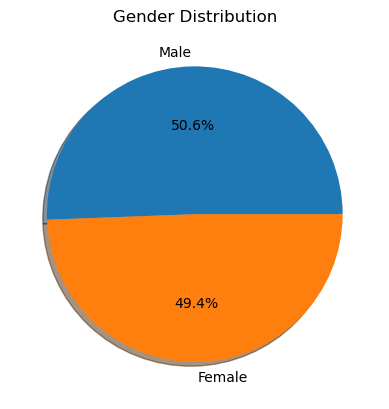

In [15]:
labels=["Male","Female"]
plt.pie(obesity_df["Gender"].value_counts(), autopct = "%1.1f%%", labels=labels, shadow = True)
plt.title("Gender Distribution")
plt.savefig("output/gender distribution.png")
plt.show()

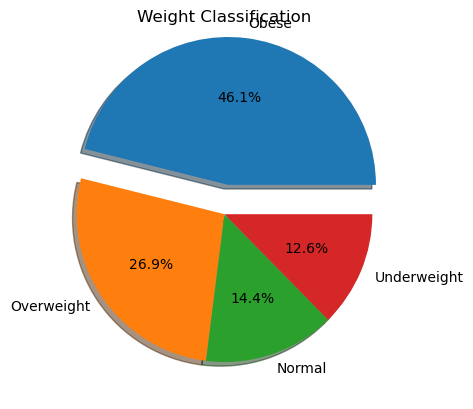

In [22]:
labels=["Obese","Overweight","Normal","Underweight" ]
explode = [0.2,0,0,0]
plt.pie(obesity_df["Weight classification"].value_counts(), autopct = "%1.1f%%",shadow = True, labels=labels, explode = explode)
plt.title("Weight Classification")
plt.savefig("output/weight classification1.png")
plt.show()

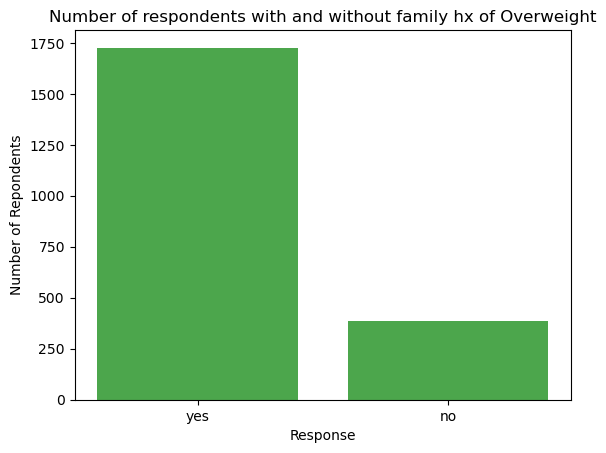

In [67]:
# assessing the extent of family hx of overweight, since family history is the only non modifiable factor being analysed.
x= np.arange(2)
xticks= ("yes", "no")
plt.bar(x,obesity_df["Fhx of Overweight"].value_counts(), color = "g", alpha = 0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Repondents")
plt.title("Number of respondents with and without family hx of Overweight")
plt.savefig("output/family history.png")
plt.show()

# ANALYSIS

The correlation between weight and height is 0.46


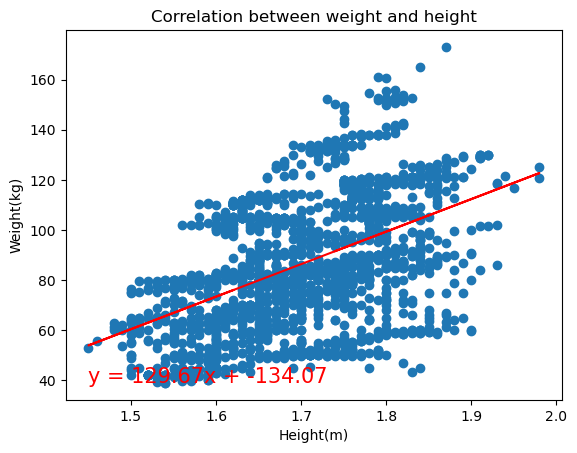

In [68]:
# is there a linear relationship between weight and height
correlation= st.pearsonr(obesity_df["Height(m)"],obesity_df["Weight(kg)"])
print(f'The correlation between weight and height is {round(correlation[0],2)}')

y_values = obesity_df["Weight(kg)"]
x_values = obesity_df["Height(m)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
plt.ylabel("Weight(kg)")
plt.xlabel("Height(m)")
plt.title("Correlation between weight and height")
plt.savefig("output/weight_height correlation.png")
plt.show()

The plot above shows the linear relationship between weight and height. There is a moderate correlation between weight and height with an r value of 0.46. Factors such as age, family genetics, diet and physical activity can influence a persons weight and height. These factors may thus explain why there isnt a strong linear correlation.

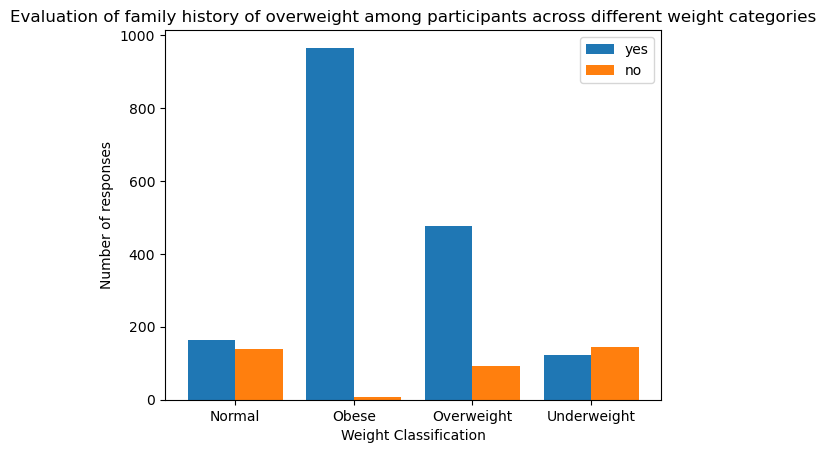

In [69]:
#those with family history of overweight, what are their weight classifications?

fam_hx_df = obesity_df.groupby(["Fhx of Overweight","Weight classification"]).size().unstack(fill_value =0)
fam_hx_df
y_yes= fam_hx_df.loc["yes"]
y_no= fam_hx_df.loc["no"]
x_axis= np.arange(len(y_yes))
xticklabels=list(y_yes.index)
plt.bar(x_axis- 0.2, y_yes,0.4, label = "yes",align = "center")
plt.bar(x_axis + 0.2, y_no,0.4, label = "no",align = "center")
plt.xticks(x_axis,xticklabels)
plt.xlabel("Weight Classification")
plt.ylabel("Number of responses")
plt.legend()
plt.title("Evaluation of family history of overweight among participants across different weight categories")
plt.savefig("output/family hx evaluation by weight class.png")
plt.show()


The above is a bar plot showing the number of respondents of the various weight classes who answered either yes or no to the question "Is there anyone who is overweight in your family?". As shown, those with normal weight or underweight had an almost equal number of yes and no responses. However, the majority of respondents in the overweight or obese responded "yes. this suggests that having a positive family history of overweight may be related to one's risk of become obese.   

# studying  Obese patients

In [70]:
print(obesity_df.count())

Gender                            2111
Age                               2111
Height(m)                         2111
Weight(kg)                        2111
Fhx of Overweight                 2111
Freq High Calorie Cons            2111
Freq vegetable cons               2111
Number of Main Meals              2111
Eating inbetween meals            2111
Hx of smoking                     2111
Water consumption                 2111
Calorie Consumption Monitoring    2111
Freq of Physical Activity         2111
Time spent on Tech devices        2111
Alcohol consumption               2111
Transportation used               2111
Weight group                      2111
BMI                               2111
Weight classification             2111
dtype: int64


In [71]:
#selecting data for only overweight and obese candidates
obese_candidates_df = obesity_df.loc[obesity_df["Weight classification"] == "Obese"]
obese_candidates_df

,Gender,Age,Height(m),Weight(kg),Fhx of Overweight,Freq High Calorie Cons,Freq vegetable cons,Number of Main Meals,Eating inbetween meals,Hx of smoking,Water consumption,Calorie Consumption Monitoring,Freq of Physical Activity,Time spent on Tech devices,Alcohol consumption,Transportation used,Weight group,BMI,Weight classification
10,Male,26.00,1.85,105.00,yes,yes,3.0,3.0,Frequently,no,3.00,no,2.00,2.00,Sometimes,Public_Transportation,Obesity_Type_I,30.7,Obese
13,Male,41.00,1.80,99.00,no,yes,2.0,3.0,Sometimes,no,2.00,no,2.00,1.00,Frequently,Automobile,Obesity_Type_I,30.6,Obese
17,Female,29.00,1.53,78.00,no,yes,2.0,1.0,Sometimes,no,2.00,no,0.00,0.00,no,Automobile,Obesity_Type_I,33.3,Obese
21,Female,52.00,1.69,87.00,yes,yes,3.0,1.0,Sometimes,yes,2.00,no,0.00,0.00,no,Automobile,Obesity_Type_I,30.5,Obese
23,Female,22.00,1.60,82.00,yes,yes,1.0,1.0,Sometimes,no,2.00,no,0.00,2.00,Sometimes,Public_Transportation,Obesity_Type_I,32.0,Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III,44.9,Obese
2107,Female,21.98,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2108,Female,22.52,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III,43.7,Obese
2109,Female,24.36,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III,44.0,Obese


## Does deitary habit have any influence on obesity risk?

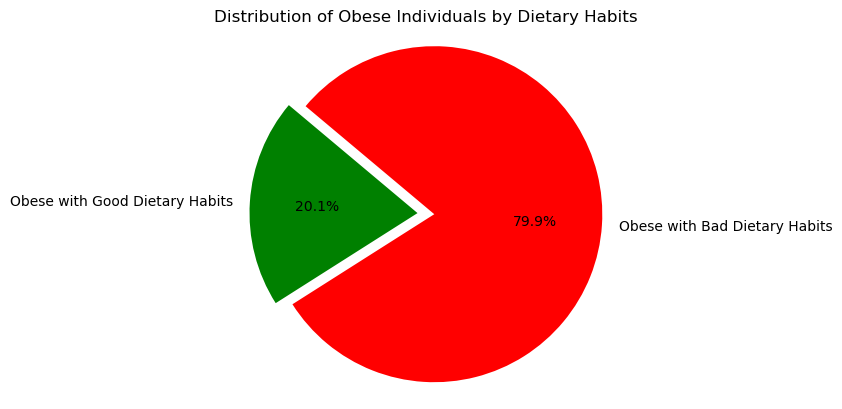

In [94]:
# how many of them have good deitary habits(ie eating vegetables,water consuption, calorie counting?)
#Count the number of obese individuals with good and bad dietary habits
#Define criteria for good dietary habits
good_diet_criteria = ((obese_candidates_df["Freq vegetable cons"] >= 3.0) &
                      (obese_candidates_df["Water consumption"] >= 2.0) &
                     (obese_candidates_df["Calorie Consumption Monitoring"] == "no"))
# Define criteria for bad dietary habits
bad_diet_criteria = ((obese_candidates_df["Eating inbetween meals"] == "yes") |
                     (obese_candidates_df["Calorie Consumption Monitoring"] == "no") |
                     (obese_candidates_df["Freq High Calorie Cons"] == "yes"))
# Count the number of obese individuals with good and bad dietary habits
num_obese_good_diet = obese_candidates_df[good_diet_criteria & obese_candidates_df["Weight group"].str.contains("Obesity")].shape[0]
num_obese_bad_diet = obese_candidates_df[bad_diet_criteria & obese_candidates_df["Weight group"].str.contains("Obesity")].shape[0]

# Prepare data for pie chart
labels = ['Obese with Good Dietary Habits', 'Obese with Bad Dietary Habits']
sizes = [num_obese_good_diet, num_obese_bad_diet]
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the "Obese with Good Dietary Habits" slice slightly for emphasis
# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Obese Individuals by Dietary Habits')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig("output/obese distribution by dietary habits.png")

plt.show()

If the consumption of vegetable is greater than or equal to 3 serving and water consumption is greater than or equal to 2 servings than the obese percentage is about 80% and about 20% is good dietary habits.  This analysis that good dietary has influence on obesity

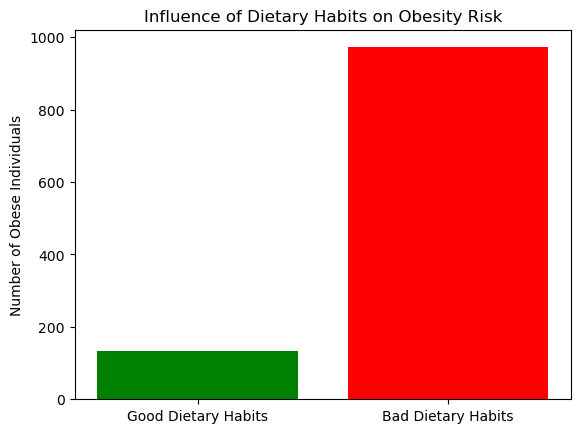

In [95]:
# Define criteria for good dietary habits
good_diet_criteria = ((obese_candidates_df["Freq vegetable cons"] == 2.0) &
                      (obese_candidates_df["Water consumption"] >= 2.0) &
                      (obese_candidates_df["Calorie Consumption Monitoring"] == "no"))
# Define criteria for bad dietary habits
bad_diet_criteria = ((obese_candidates_df["Eating inbetween meals"] == "yes") |
                     (obese_candidates_df["Calorie Consumption Monitoring"] == "no") |
                     (obese_candidates_df["Freq High Calorie Cons"] == "yes"))
# Count the number of obese individuals with good and bad dietary habits
num_obese_good_diet = obese_candidates_df[good_diet_criteria].shape[0]
num_obese_bad_diet = obese_candidates_df[bad_diet_criteria].shape[0]
# Create bar graph
labels = ['Good Dietary Habits', 'Bad Dietary Habits']
counts = [num_obese_good_diet, num_obese_bad_diet]
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Influence of Dietary Habits on Obesity Risk')
plt.ylabel('Number of Obese Individuals')
plt.savefig("output/Influence of Dietary Habits on Obesity Risk.png")
plt.show()


In [ ]:
The analysis highlights a concerning trend among the overweight and obese population, where bad dietary habits appear to be more prevalent than
good ones. The absence of data for obese individuals with good dietary habits suggests a potential gap in healthy eating behaviors within this
population. This observation underscores the need for targeted interventions aimed at promoting healthier dietary habits and lifestyle choices
to mitigate obesity risk. By addressing these factors, we can work towards reducing the burden of obesity and improving overall public health outcomes.


## Do smoking and alcohol consumption have any influence on obesity risk?

In [80]:
# Filter out non-smokers
smoking_df = obese_candidates_df[obesity_df["Hx of smoking"] != "no"]
smoke_counts_df = smoking_df.groupby("Weight classification")["Hx of smoking"].value_counts().unstack(fill_value=0)

# how many smoke for obese
# Count the occurrences of smoking for each weight class
smoke_counts_df = obese_candidates_df.groupby("Weight classification")["Hx of smoking"].value_counts().unstack(fill_value=0)

# how many drink alcohol(lifestyle) for obese
# Count the occurrences of drinking for each weight class
alcohol_counts_df = obese_candidates_df.groupby("Weight classification")["Alcohol consumption"].value_counts().unstack(fill_value=0)



C:\Users\andre\AppData\Local\Temp\ipykernel_2928\3461184253.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smoking_df = obese_candidates_df[obesity_df["Hx of smoking"] != "no"]


Frequency of smoking and alcohol consumption for each weight class (excluding non-drinkers):
                        no  yes  Frequently  Sometimes   no
Weight classification                                      
Obese                  951   22          16        720  237


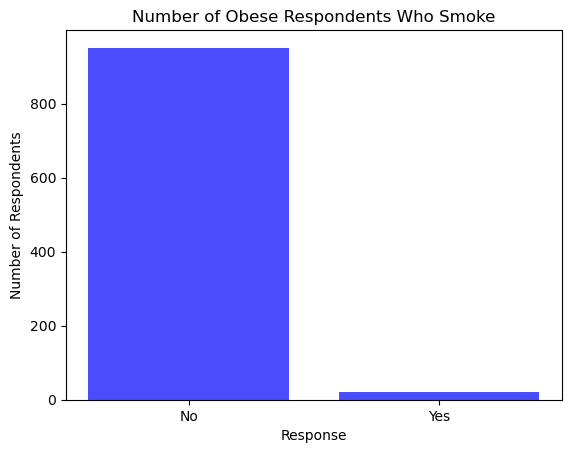

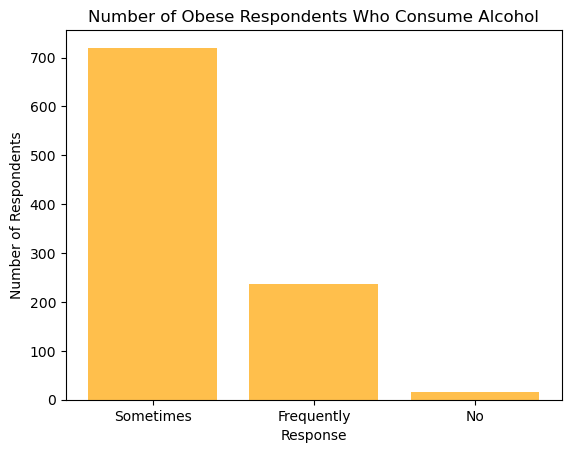

Frequency of smoking and alcohol consumption for each weight class
                        no  yes  Frequently  Sometimes   no
Weight classification                                      
Obese                  951   22          16        720  237


In [85]:
# Count the occurrences of 'Hx of smoking' and 'Alcohol consumption' for each 'Weight classification'
smoke_counts = obese_candidates_df.groupby("Weight classification")["Hx of smoking"].value_counts().unstack(fill_value=0)
alcohol_counts = obese_candidates_df.groupby(["Weight classification", "Alcohol consumption"]).size().unstack(fill_value=0)
# Combine the smoke and alcohol counts into a single DataFrame
lifestyle_df = pd.concat([smoke_counts, alcohol_counts], axis=1)
# Print or display the new DataFrame
print("Frequency of smoking and alcohol consumption for each weight class (excluding non-drinkers):")
print(lifestyle_df)

#Second step - Combine the smoke and alcohol counts into a single DataFrame
lifestyle_df = pd.concat([smoke_counts_df, alcohol_counts_df], axis=1)
# Plot the bar graph for smoking
x = np.arange(2)
xticks = ("No", "Yes")
plt.bar(x, obese_candidates_df["Hx of smoking"].value_counts(), color="blue", alpha=0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.title("Number of Obese Respondents Who Smoke")
plt.savefig("output/Number of respondents who smoke.png")
plt.show()

# Plot the bar graph for alcohol consumption
x = np.arange(3)
xticks = ("Sometimes", "Frequently", "No")
plt.bar(x, obese_candidates_df["Alcohol consumption"].value_counts(), color="orange", alpha=0.7)
plt.xticks(x, xticks)
plt.xlabel("Response")
plt.ylabel("Number of Respondents")
plt.title("Number of Obese Respondents Who Consume Alcohol")
plt.savefig("output/Number of Obese Respondents Who Consume Alcohol.png")

plt.show()

# Print the DataFrame showing the frequency of smoking and alcohol consumption for each weight class
print("Frequency of smoking and alcohol consumption for each weight class")
print(lifestyle_df)

The bar graphs presented above indicate values regarding alcohol consumption and smoking, respectively. The number of obese respondents voted "No" at a significantly greater rate than "Yes". Based on the data provided there is a low correlation between smoking and obesity. However, the opposite is true concerning alcohol consumption. Here it is evident that the majority of respondents who are obese consume alcohol frequently.

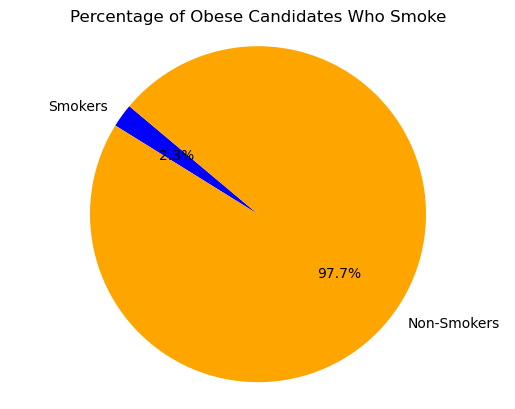

In [86]:
#To show a correlational relationship: What percentage of obese candidates are smokers?
# Calculate the total number of obese candidates
total_candidates = obese_candidates_df.shape[0]
# Count the number of smokers and non-smokers
smokers_count = (obese_candidates_df["Hx of smoking"] == "yes").sum()
non_smokers_count = total_candidates - smokers_count
# Calculate the percentages
percentage_smokers = (smokers_count / total_candidates) * 100
percentage_non_smokers = (non_smokers_count / total_candidates) * 100
# Create label pie chart
labels = ["Smokers", "Non-Smokers"]
sizes = [percentage_smokers, percentage_non_smokers]
colors = ["blue", "orange"]
# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Obese Candidates Who Smoke")
plt.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("output/percentage of candidates who smoke.png")
plt.show()

This pie chart depicts that the majority of obese candidates are non-smokers.

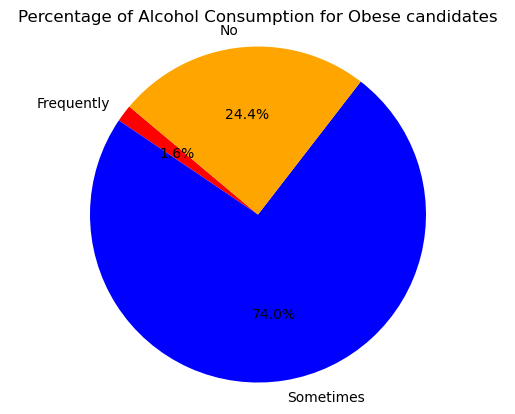

In [87]:
#To show a correlational relationship: What percentage of obese candidates consume alcohol?
#Count the occurrences of Alcohol consumption for each 'Weight classification'
alcohol_counts_df = obese_candidates_df.groupby("Weight classification")["Alcohol consumption"].value_counts().unstack(fill_value=0)
# Calculate the total number of obese candidates
total_candidates = alcohol_counts_df.sum(axis=1)
# Calculate the percentage of each alcohol consumption category for each weight class
percentage_frequently = (alcohol_counts_df["Frequently"] / total_candidates) * 100
percentage_sometimes = (alcohol_counts_df["Sometimes"] / total_candidates) * 100
percentage_no = (alcohol_counts_df["no"] / total_candidates) * 100
# Create labels and sizes for the pie chart
labels = ["Frequently", "Sometimes", "No"]
colors = ["red", "blue", "orange"]
# Plot the pie chart for each weight class
for weight_class in alcohol_counts_df.index:
  sizes = [percentage_frequently[weight_class],
       percentage_sometimes[weight_class], percentage_no[weight_class]]
  plt.figure()
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.title(f"Percentage of Alcohol Consumption for {weight_class} candidates")
  plt.axis("equal")
  plt.savefig("output/percentage alcohol consumption.png")
  
  plt.show()

This pie chart indicates a correlation between alcohol consumption and obesity. Showing that almost 75% of the obese individuals in this data set consume alcohol.

## Does physical activity have any influence on obesity risk?

Correlation between Frequency of Physical Activity and BMI: -0.07, p-value: 0.02
LinregressResult(slope=-0.012314590596493728, intercept=1.334597142182772, rvalue=-0.07258208977040075, pvalue=0.023566376897097552, stderr=0.005430426059272952, intercept_stderr=0.20223364378004272)


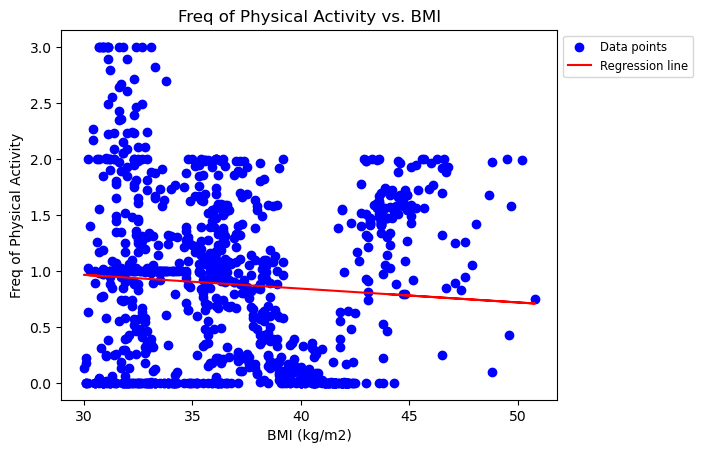

In [99]:
#does physical activity have any correlation with risk of obesity?
# Analyze correlation between physical activity and BMI
correlation, p_value = pearsonr(obese_candidates_df ['BMI'], obese_candidates_df ['Freq of Physical Activity'])
print(f"Correlation between Frequency of Physical Activity and BMI: {correlation:.2f}, p-value: {p_value:.2f}")
y_values = obese_candidates_df ["Freq of Physical Activity"]
x_values = obese_candidates_df ["BMI"]
# Perform linear regression calculations
regress_values = stats.linregress(x_values, y_values)
slope = regress_values.slope
intercept = regress_values.intercept
print(regress_values)
# Equation of the regression line
equation = f"y = {slope:.2f}x + {intercept:.2f}"
# Scatter plot
plt.scatter(x_values, y_values, color="blue", label="Data points")
plt.plot(x_values, slope * x_values + intercept, color="red", label="Regression line")
plt.ylabel("Freq of Physical Activity")
plt.xlabel("BMI (kg/m2)")
plt.title("Freq of Physical Activity vs. BMI")
plt.annotate(equation,(2.2,50), fontsize=12, color='r')
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (2.2,47), fontsize=12, color='r')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.savefig("output/Freq of Physical Activity vs. BMI.png")
plt.show()

The correlation coefficient is approximately -0.07. This value suggests a weak negative correlation between the frequency of physical activity and body mass index (BMI). As frequency of physical ativity increases, BMI tends to decrease slightly.The p-value associated with this correlation is 0.02 (< 0.05) indicates that the correlation is statistically significant.However, the weak correlation coefficient indicates the effect size is small, and that other factors are likely to play a more significant role in influencing BMI variations withing this data.

The slope = 0.145, intercept = 36.875
LinregressResult(slope=0.14548892151673745, intercept=36.875069596381806, rvalue=0.017457890320392983, pvalue=0.586507187595543, stderr=0.2674005875049725, intercept_stderr=0.2174668019049134)


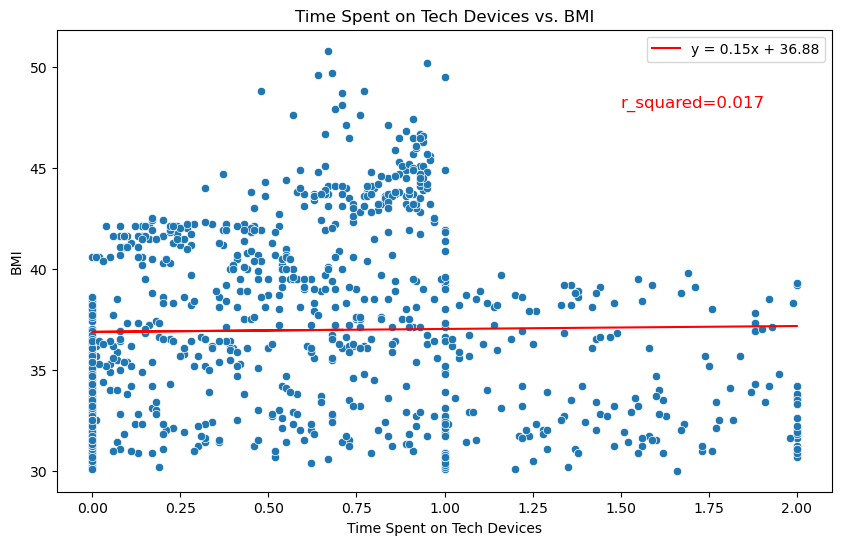

In [98]:
# Scatter plot of Time Spent on Devices vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Time spent on Tech devices", y="BMI", data=obese_candidates_df)
plt.title("Time Spent on Tech Devices vs. BMI")
plt.xlabel("Time Spent on Tech Devices")
plt.ylabel("BMI")
# Calculate the coefficients (slope and intercept) for the linear regression line
slope, intercept = np.polyfit(obese_candidates_df["Time spent on Tech devices"], obese_candidates_df["BMI"], 1)
print(f"The slope = {slope:.3f}, intercept = {intercept:.3f}")
# Perform linear regression calculations
regress_values = stats.linregress(obese_candidates_df ["Time spent on Tech devices"], obese_candidates_df ["BMI"])
print(regress_values)
# Create the line equation using the slope and intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
# Plot the linear regression line
plt.plot(obese_candidates_df["Time spent on Tech devices"], slope * obese_candidates_df["Time spent on Tech devices"] + intercept, color='red', label=line_eq)
plt.annotate(f"r_squared={regress_values.rvalue:.3f}", (1.5,48), fontsize=12, color='r')
plt.legend()
plt.savefig("output/Freq of Physical Activity vs. BMI.png")
plt.show()

The P-value of 0.59 (>0.05) implies that there is no sighnificant relationship between tim espent on tech devices and BMI. We need to remember that correlation does not imply causation. Thus, further investigation or additional variables would be needed to draw more meaningful conclusions.

In [74]:
# A positive correlation means that as one variable increases, the other variable tends to also increase.
# A negative correlation means that as one variable increases, the other variable tends to decrease.
correlations = obese_candidates_df[['Time spent on Tech devices', 'Freq of Physical Activity', 'BMI']].corr()
correlations

,Time spent on Tech devices,Freq of Physical Activity,BMI
Time spent on Tech devices,1.000000,0.136925,0.017458
Freq of Physical Activity,0.136925,1.000000,-0.072582
BMI,0.017458,-0.072582,1.000000


The correlation matrix above only reveals the strength and direction of the linear relationship between the 3 variables, not necessarily cause-and-effect. All correlations in this matrix are negative (values close to -1). There seems to be a weak negative correlation between "Time spent on Tech devices" and "Freq of Physical Activity" (around -0.14). This suggests that as time spent on tech devices increases, the frequency of physical activity might slightly decrease, but the correlation is weak. There's also a weak negative correlation between "Freq of Physical Activity" and "BMI" (around -0.07). This indicates a potential trend where higher physical activity frequency might be associated with lower BMI, but again, the correlation is weak Without knowing more about the data collection process, sample population, or units of measurement, it's difficult to draw definitive conclusions.

Transportation used
Automobile               34.683010
Bike                     38.500000
Motorbike                31.733333
Public_Transportation    37.615526
Walking                  32.900000
Name: BMI, dtype: float64


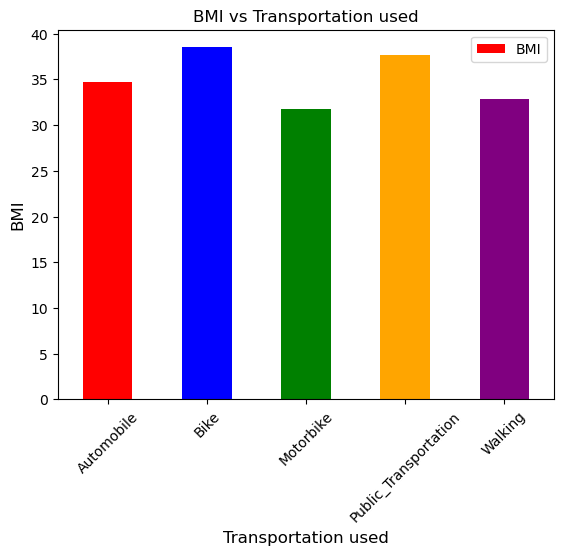

In [97]:
transport = obese_candidates_df.groupby(['Transportation used'])['BMI'].mean()
print(transport)
transport.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple'])
# Add labels and title
plt.xlabel('Transportation used', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.title('BMI vs Transportation used')
plt.legend()
plt.savefig("output/BMI vs Transportation used.png")
plt.show()

The bar plot above provides a snapshot of the number of people who used different modes of transportation, grouped by their Body Mass Index (BMI) category.Automobile is the most commonly used mode of transportation. This chart depicts a correlation between transportation mode and BMI, but it doesn't necessarily imply causation. Other factors could be influencing both variables.

Public_Transportation    760
Automobile               206
Walking                    3
Motorbike                  3
Bike                       1
Name: Transportation used, dtype: int64
Boxplot Statistics:
                       Median     Q1     Q3   min   max
Transportation used                                    
Automobile              34.45  32.30  37.00  30.1  40.6
Bike                    38.50  38.50  38.50  38.5  38.5
Motorbike               31.20  30.95  32.25  30.7  33.3
Public_Transportation   36.95  33.20  41.60  30.0  50.8
Walking                 31.60  31.30  33.85  31.0  36.1


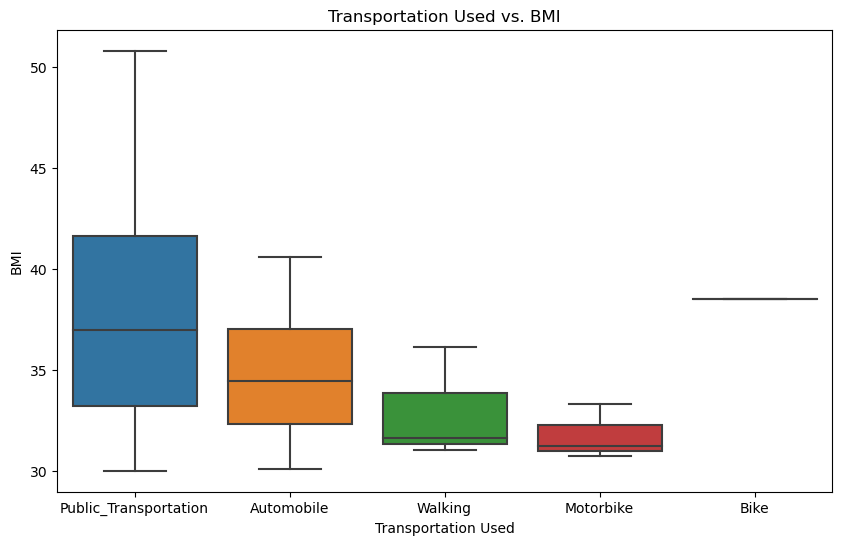

In [100]:
# Dataframe
obese_candidates_df = obesity_df.loc[obesity_df["Weight classification"] == "Obese"]
# Check for missing data
transportation_counts = obese_candidates_df['Transportation used'].value_counts()
print(transportation_counts)
# Create the boxplot (unchanged)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Transportation used", y="BMI", data=obese_candidates_df)
plt.title("Transportation Used vs. BMI")
plt.xlabel("Transportation Used")
plt.ylabel("BMI")

# Access data and calculate statistics directly using pandas
transportation_groups = obese_candidates_df.groupby('Transportation used')['BMI']
boxplot_stats = transportation_groups.describe(percentiles=[0.25, 0.75])[['50%', '25%', '75%', 'min', 'max']]
# Print the statistical information (formatted for readability)
print("Boxplot Statistics:")
print(boxplot_stats.rename(columns={'50%': 'Median', '25%': 'Q1', '75%': 'Q3'}))
plt.savefig("output/Transportation usedI vs. BMI.png")
plt.show()

The boxplot above concise summary of the BMI distribution within each transportation category, enabling comparisons and insights into the variability and central tendencies of BMI values across different modes of transportation. Here we can see that individuals that use bikes have the highest median BMI (38.5)vs those that use motorbiles and walkers who have the lowest BMI (31.2 & 31.6 respectively).Of note, the boxplot for bikes is barely visible because there was only 1 individual noted to use it. This incidence could skew our results thus care has to be used when drawing conclusions. The whiskers shows the widest range in the public transportation group compared to others.In summary, differences in median and quartile values between categories may indicate variations in BMI distributions amonf individuals using different transportation modes.